In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("boston_housing.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [4]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(13,)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with 1 neuron (regression output)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [6]:
history=model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 639.2284 - mae: 23.1871 - val_loss: 536.2424 - val_mae: 21.5781
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 625.2170 - mae: 22.9521 - val_loss: 503.4493 - val_mae: 20.8107
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 525.6244 - mae: 21.1415 - val_loss: 467.2756 - val_mae: 19.9311
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 494.9826 - mae: 20.1309 - val_loss: 421.9710 - val_mae: 18.7824
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 476.4391 - mae: 19.6200 - val_loss: 367.2995 - val_mae: 17.3015
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 410.6396 - mae: 17.7041 - val_loss: 303.3503 - val_mae: 15.5120
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 315.1168 - mae: 15.2980 - val_loss: 235.5598 - val_mae: 13.4777
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 246.4990 - mae: 13.1928 - val_loss: 165.8997 - val_mae: 11.0575
Epoch 9/100

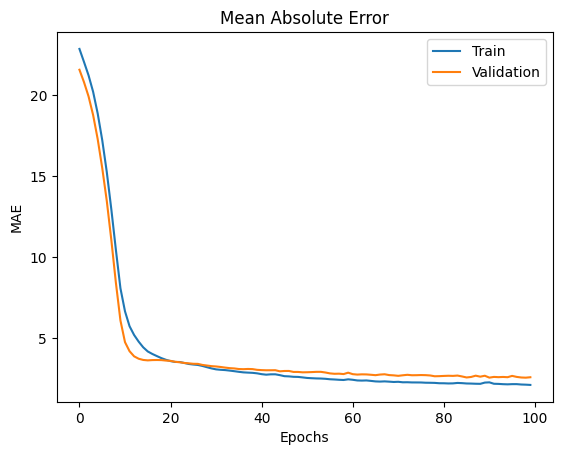

In [7]:
plt.plot(history.history['mae'],label='Train')
plt.plot(history.history['val_mae'],label='Validation')
plt.legend(),plt.title('Mean Absolute Error'),plt.xlabel('Epochs'),plt.ylabel('MAE')
plt.show()

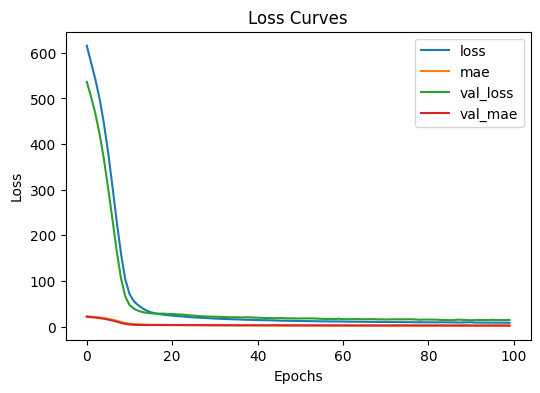

In [9]:
pd.DataFrame(history.history).plot(figsize=(6, 4), xlabel="Epochs", ylabel="Loss", title='Loss Curves')
plt.show()

In [8]:
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Mean Absolute Error: {mae:.2f}")


4/4 - 0s - 12ms/step - loss: 12.6990 - mae: 2.3672
Test Mean Absolute Error: 2.37
